## Detecting Fake News

Read detail about dataset! - > https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

## Steps For Cleaning Data

1. Punctuation Removal
2.  Lowering the text 
3. Tokenization
4. Stop word removal


In [152]:
# import library
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import string
import numpy as np
#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

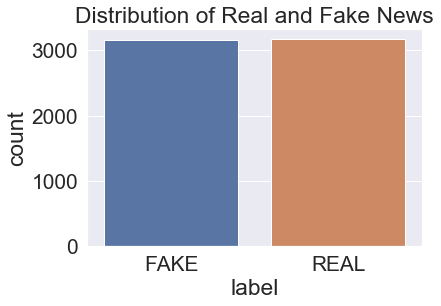

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [153]:
# Read Data
data = pd.read_csv("./Datasets/news.csv")


sns.countplot(data.label)
plt.title("Distribution of Real and Fake News")
plt.show()
data['label'].value_counts()

In [154]:
# Information about data- 
data.head()  # Show 5 items of dataset
data.info()  # Show information about dataset
data.shape # Check size of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


(6335, 4)

In [155]:
#defining the function to remove punctuation
def remove_punctuation(text):
        punctuationfree= "".join([i for i in text if i not in string.punctuation])
        return punctuationfree

#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

# Text-preprocessing

In [156]:
#Merge title and text
data['full_text'] = data['title'] + " "  + data['text']
data = data[['full_text','label']]

In [157]:
#storing the puntuation free text
data['clean_text']= data['full_text'].apply(lambda x:remove_punctuation(x))

In [158]:
#Lowering the text
data['text_lower']= data['clean_text'].apply(lambda x: x.lower())

In [159]:
#applying function for tokenization
data['text_tokenied']= data['text_lower'].apply(lambda x: tokenization(x))

In [160]:
labels = data.label

# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['full_text'], labels, test_size=0.2, random_state=7)

# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)


# Classification Models

In [161]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
sgd= SGDClassifier(max_iter=1000, tol=1e-3)
lregression = LogisticRegression(random_state=0)
kneighbors = KNeighborsClassifier()
randomForest = RandomForestClassifier()

models = [pac, sgd, lregression, kneighbors, randomForest]
ModelAccuracy = []
modelNames = []
for model in models:
    # Predict on the test set and calculate accuracy
    model.fit(tfidf_train,y_train)
    y_pred=model.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    accuracy = round(score*100,2)
    ModelAccuracy.append(accuracy)
    modelNames.append(type(model).__name__)
    print(f'Accuracy: {round(score*100,2)}%')

print(ModelAccuracy)
print(modelNames)
# Create a pandas dataframe
df = pd.DataFrame({'Model': modelNames,
                   'Accuracy': ModelAccuracy})
 
# Display Dataframe
df

Accuracy: 92.19%
Accuracy: 92.9%
Accuracy: 91.48%
Accuracy: 85.4%
Accuracy: 89.34%
[92.19, 92.9, 91.48, 85.4, 89.34]
['PassiveAggressiveClassifier', 'SGDClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier']


,Model,Accuracy
0,PassiveAggressiveClassifier,92.19
1,SGDClassifier,92.90
2,LogisticRegression,91.48
3,KNeighborsClassifier,85.40
4,RandomForestClassifier,89.34


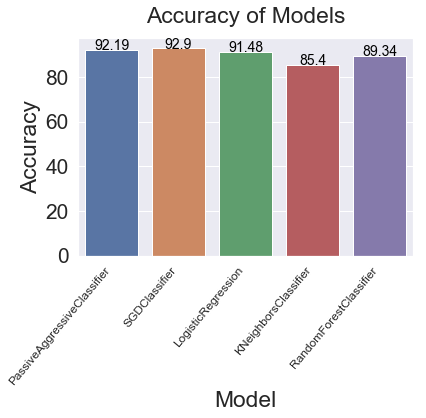

In [162]:
#Visualize Accuracy of Models
chart = sns.barplot(x="Model", y="Accuracy", data=df)

for index, row in df.iterrows():
    chart.text(row.name,row.Accuracy, round(row.Accuracy,2),color='black', ha="center", fontsize=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=50, horizontalalignment='right', fontsize=12)

plt.title("Accuracy of Models",  fontweight=10, 
          pad='15.0')
plt.show()

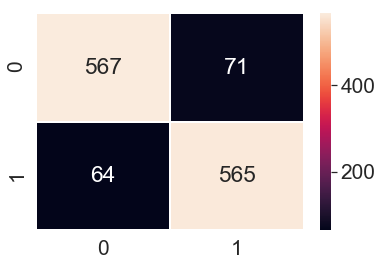

In [163]:
# Build confusion matrix of last model
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
sns.set(font_scale=1.9)
sns.heatmap(confusion_matrix, linewidths=1, annot=True, fmt='g')
plt.show()

# Further Readings

###### https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
###### https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
###### https://thecleverprogrammer.com/2021/02/10/passive-aggressive-classifier-in-machine-learning/#:~:text=Passive%20Aggressive%20Classifier%20belongs%20to,as%20aggressive%20for%20any%20miscalculation.
######  https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
###### https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
###### https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a